ALUNOS : 

CARLOS DINART SANTOS DE MORAES JUNIOR.

DOUGLAS SILVA DE ALMEIDA.

LUCAS DO LAGO MONIZ DA SILVA.

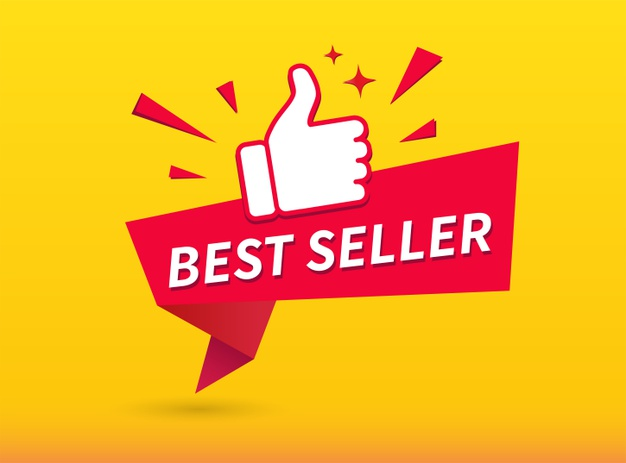

Vamos fundar uma empresa, a Best Seller. O que a Best Seller faz:

A Best Seller é um marketplace / buscador de produtos, o usuário pesquisa o produto desejado no nosso site, o qual, mostrará os produtos que estão disponiveis em outros websites (Amazon, Mercado Livre, Americanas, etc.). O usuário também terá a opção de fazer a compra diretamento pelo site da Best Seller, onde haverá descontos para certos produtos.


O desenvolvimento foi pensado para que **facilite ao usuário encontrar a melhor opção sobre o produto desejado**, extraindo informações e **apresentando-as  de forma que não seriam de facil acesso ao usuário.**

Nossa plataforma opera da seguinte forma:

 O usuário realiza a busca através de nossa plataforma e tem como retorno diversas informações sobre o produto e a relação de sites que tem tal produto para venda, como conclusão o usuário realiza a compra através de nosso marketplace.
 
 Utilidade de nosso sistema de recomendação:
 - Ajudar o usuário a encontrar o produto certo.
 - Aumentar o envolvimento do usuário. Por exemplo, há 40% mais cliques nas notícias do google devido à recomendação.

 - Auxílio aos fornecedores de itens a entregá-los ao usuário interessado.
 
- Na Amazon, 35% dos produtos são vendidos devido à recomendação.

- Tornar o conteúdo cada vez mais personalizado. Na Netflix por exemplo, a maioria dos filmes vistos são de recomendações.

Nosso projeto conta com funcionalidades que impulsionam as vendas de nossa plataforma, recomendando os produtos de melhor avaliação e também produtos que possam interessar ao cliente conforme os produtos visualizados. Além das recomendações, criamos modelos que ajudam na tomada de decisão acerca da localidade para abertura do nosso empreendimento. E ainda, um sistema de identificação de fraude nas compras de cartão de crédito. A descrição detalhada da aplicação de cada modelo e algorítimo consta ao decorrer deste caderno.

Os algoritmos e os modelos matemáticos aplicados ao decorrer deste projeto são: KNN, Naive Bayes, Regressão Logística e Regressão Linear.

#banco de dados

###Modelo conceitual

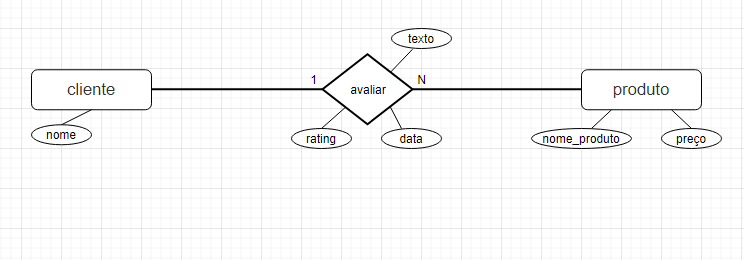

###Modelo Logico

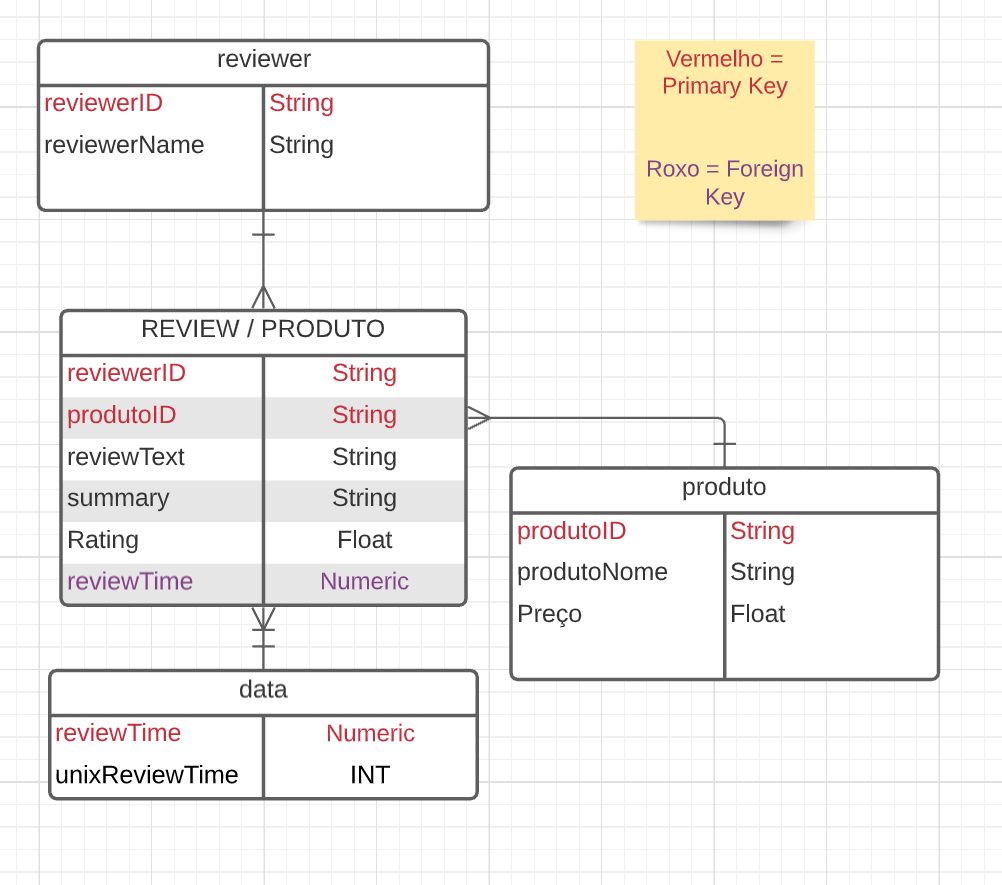

###Modelo Físico

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(':memory:')
c = conn.cursor()


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto Integrado/Projeto_Amazon/Musical_instruments_reviews.csv')
data['reviewText'].isna().value_counts()
data.dropna(subset=['reviewText'], inplace=True)
data.rename(columns={'overall':'Rating'},inplace=True)


In [ ]:
#Criando as tabelas
c.execute('CREATE TABLE IF NOT EXISTS reviewer (ReviewerID TEXT, ReviewerName TEXT)')
c.execute('CREATE TABLE IF NOT EXISTS produto (ProdutoID TEXT)')#aqui não foi colocado o nome e o preço pois nos dataset que importamos não consta esses dados.
c.execute('CREATE TABLE IF NOT EXISTS reviewPorProduto (ReviewerID TEXT, ProdutoID INT, ReviewText TEXT, Summary TEXT, Rating REAL, ReviewTime NUMERIC)')
c.execute('CREATE TABLE IF NOT EXISTS data (ReviewTime NUMERIC, unixReviewTime INT)')
conn.commit()

In [ ]:
def instertBolado(lista_De_Itens, tabela):

  '''
  input: Lista contendo os elementos que serão inseridos, nome da tabela que vai receber o insert
  '''
  valores = lista_De_Itens
  c.execute(f"INSERT INTO {tabela} VALUES (?{',?'*(len(lista_De_Itens)-1)})",valores)
  conn.commit()


In [ ]:
#inserindo a tabela reviewer

zip_object = zip(data['reviewerID'].unique(),data['reviewerName'].unique())
for elemento1 in zip_object:
  instertBolado(elemento1, 'reviewer')
    

In [ ]:
#inserindo a tabela produto

zip_object = zip(data['asin'].unique())
for elemento1 in zip_object:
  instertBolado(elemento1, 'produto')
    

In [ ]:
#inserindo a tabela review por produto

zip_object = zip(data['reviewerID'],data['asin'], data['reviewText'], data['summary'], data['Rating'], data['reviewTime']   )
for elemento1 in zip_object:
  instertBolado(elemento1, 'reviewPorProduto')
 

In [ ]:
#inserindo a tabela data
data['unixReviewTime'] = data.unixReviewTime.astype(str)#converti para string pq tava dando erro.

zip_object = zip(data['reviewTime'].unique(),data['unixReviewTime'].unique())
for elemento1 in zip_object:
  instertBolado(elemento1, 'data')
    

In [ ]:
def visualização(coluna, tabela, where=None):
  '''
  Esta função tem como objetivo visualizar uma ou todas as colunas de uma tabela

  input: nome da coluna que será visualizada e nome da tabela
  input type: string

  output: df com as colunas
  '''
  if where == None:
    selectColuna= f'SELECT {coluna} from {tabela}'
    df = pd.read_sql(selectColuna, conn)
    return df
  elif where != None:
    selectColuna= f'SELECT {coluna} from {tabela} WHERE {coluna} = "{where}"'
    df = pd.read_sql(selectColuna, conn)
    return df


In [ ]:
visualização('*','reviewPorProduto')

In [ ]:
visualização('*', 'data')

###Questão para o BD responder:


1- Crie uma visualização com sql de todas as colunas das tabelas.

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re
INNER JOIN reviewer on reviewer.ReviewerID= re.ReviewerID 
INNER JOIN Data on Data.ReviewTime = re.ReviewTime ''',conn )

2- Agora faça o mesmo sem usar o INNER JOIN, somente o WHERE

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re, reviewer, Data
WHERE reviewer.ReviewerID= re.ReviewerID AND Data.ReviewTime = re.ReviewTime
 ''',conn )

3 - Agora Selecione somente os 5 primeiros valores de cada tabela

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re, reviewer, Data
WHERE reviewer.ReviewerID= re.ReviewerID AND Data.ReviewTime = re.ReviewTime LIMIT 5
 ''',conn )

4 - ordenar pelas avaliações, menor para maior

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re, reviewer, Data
WHERE reviewer.ReviewerID= re.ReviewerID AND Data.ReviewTime = re.ReviewTime
ORDER BY 
  Rating ASC
 ''',conn )

5 - ordenar pelas avaliações maior para menor

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re, reviewer, Data
WHERE reviewer.ReviewerID= re.ReviewerID AND Data.ReviewTime = re.ReviewTime
ORDER BY 
  Rating DESC
 ''',conn )

6 - Delete um valor de uma coluna.

In [ ]:
c.execute('''
DELETE FROM reviewPorProduto  
WHERE ProdutoID = "1384719342" ''' )

pd.read_sql('''
SELECT re.ReviewerID, ReviewerName, ProdutoID, ReviewText, Summary, Rating, re.ReviewTime, unixReviewTime 
FROM reviewPorProduto as re, reviewer, Data
WHERE reviewer.ReviewerID= re.ReviewerID AND Data.ReviewTime = re.ReviewTime
ORDER BY 
  Rating DESC
 ''',conn )

7 - Altere o resumo (summary) de uma review.

In [ ]:
c.execute(''' UPDATE reviewPorProduto
SET Summary = "ALTEREI ESTA  "
WHERE reviewerID = "A2A039TZMZHH9Y" ''' )
pd.read_sql('SELECT * FROM reviewPorProduto ', conn)

8 - Pesquise quais reviews contém a palavra bom (good)

In [ ]:
pd.read_sql('''
SELECT re.ReviewerID,  ProdutoID, ReviewText, Summary, Rating, re.ReviewTime  
FROM reviewPorProduto as re 
WHERE ReviewText LIKE "%good%"
''',conn )

9 - Quantos Reviews tem o produto B00004Y2UT - COUNT()

In [ ]:
pd.read_sql('''
SELECT COUNT(*) 
FROM reviewPorProduto
WHERE ProdutoID = "B000068NW5"
''',conn )

10 - Selecione a média das avaliações - AVG()

In [ ]:
pd.read_sql('''
SELECT avg(Rating)
FROM reviewPorProduto
''',conn )

#Multinomial Naive Bayes:


In [ ]:
#fazendo os imports
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import warnings

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Lendo o dataset

In [ ]:
def feedback(df):
  '''ESTÁ FUNÇÃO SERÁ UTILIZADA PARA CRIAR UMA NOVA COLUNA QUE DEFINIRÁ SE A AVALIAÇÃO FOI POSITIVA (1) OU NEGATIVA (0)
  
  EX: USUARIO DEU A NOTA 3 PARA O PRODUTO, ESTA NOTA SERÁ CLASSIFICADA COMO POSITIVA (1)
  '''
  rating = df['Rating']
  feedback = []
  for i in rating:
    if i >3:
      feed = 1
    else:
      feed = 0
    feedback.append(feed)
  return feedback

In [ ]:
def criaNovoDF(df):
  data = df[df['Rating']<4]
  data2 = df[df['Rating']==5]
  data2 = data2.loc[0:1001]

  data4 =df[df['Rating']==4]
  data4=data4.reset_index(drop=True).loc[0:1000]

  final = pd.concat([data,data2,data4])
  final.reset_index(drop=True, inplace=True)
  return final

In [ ]:
def separarPositivos(df):
  positivo = df[df['feedback']==1]
  negativo = df[df['feedback']==0]
  return positivo, negativo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto Integrado/Projeto_Amazon/Musical_instruments_reviews.csv')
df['reviewText'].isna().value_counts()
df.dropna(subset=['reviewText'], inplace=True)
df.rename(columns={'overall':'Rating'},inplace=True)

In [ ]:
data = df
data

In [ ]:
df = criaNovoDF(df)
df['feedback']= feedback(df)
df

In [ ]:
df['reviewText'][0]

In [ ]:
df['Rating'].value_counts()

###Dividindo e treinando os dados

In [ ]:

x_train = df['summary']
y_train=df['feedback']


In [ ]:
vectorizer = CountVectorizer()
X_tokens = vectorizer.fit_transform(x_train)
X_tokens.shape

In [ ]:
#visualizando o vocabulário
vectorizer.vocabulary_.keys()

In [ ]:
transformer = TfidfTransformer()
treinoX_id = transformer.fit_transform(X_tokens)
#print(treinoX_id[24])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(treinoX_id,y_train,shuffle=True,test_size=0.30,random_state=250,stratify=y_train)

In [ ]:
modelo = MultinomialNB().fit(train_data,train_labels)
y_pred= modelo.predict(test_data)


In [ ]:
y_pred

Salvando o modelo com pickle

In [ ]:
import pickle
with open('Naive-Bayes','wb') as f:
  pickle.dump(modelo, f)

In [ ]:
#carregando o modelo
with open('Naive-Bayes', 'rb') as f:
  m = pickle.load(f)

In [ ]:
y_pred2= m.predict(test_data)


In [ ]:
y_pred == y_pred2

###visualização

In [ ]:
accuracy_score(test_labels, y_pred)

In [ ]:
precision_score(test_labels, y_pred)

In [ ]:
recall_score(test_labels, y_pred)

In [ ]:
print(classification_report(test_labels, y_pred))

In [ ]:
mat =confusion_matrix(test_labels, y_pred)
axes = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True)

In [ ]:
#teste
exemplo = ['I loved my alexa', 'it does not work', 'useless','terribly good', 'it is broken']


In [ ]:
teste =vectorizer.transform(exemplo)

In [ ]:
modelo.predict(teste)

In [ ]:

import nltk
#nltk.download('stopwords')
nltk.download('punkt')
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer, SnowballStemmer
from wordcloud import WordCloud
from PIL import Image
import numpy as np


In [ ]:
import spacy


def clean_message2(message):
  sp = spacy.load('en_core_web_sm')
  message = message.str.cat()
  all_stopwords = sp.Defaults.stop_words
  #coverter para minusculo
  text_tokens = word_tokenize(message.lower())

  tokens_without_sw= [word for word in text_tokens if not word in all_stopwords and word.isalpha()]

  return tokens_without_sw

###WordCloud

In [ ]:
positivo, negativo = separarPositivos(df)

In [ ]:
positivo['summary'].str.cat()

Palavras mais recorrentes entre as análises positivas

In [ ]:
#wordcloud
text =str(clean_message2(positivo['summary']))
#mask_ = np.array(Image.open('/content/dollar.png'))
wc = WordCloud(background_color='white',colormap='BrBG' , max_font_size=200, height=1500, width= 1500)
wc.generate(text)

plt.figure(figsize=(10,8), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show

Palavras mais recorrentes entre as análises negativas

In [ ]:
#wordcloud
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

text =str(clean_message2(negativo['summary']))
mask_ = np.array(Image.open('/content/dollar.png'))
wc = WordCloud(background_color='black', mask= mask_)
wc.generate(text)

plt.figure(figsize=(10,8), dpi=120)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show

#Sistemas de Recomendação com KNN

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')


## carregando o dataset

In [ ]:
electronics_data=pd.read_csv('/content/drive/MyDrive/Data Science/Projeto Integrado/Projeto_Amazon/Musical_instruments_reviews.csv')
electronics_data.head()

In [ ]:
electronics_data.info()


In [ ]:
electronics_data.dropna(subset=['reviewText'], inplace=True)
electronics_data.describe()['overall'].T

Verificando se existem valores nulos


In [ ]:

print('Number of missing values across columns: \n',electronics_data.isnull().sum())



### Ratings

In [ ]:
# Checando a distribuição das avaliações
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Quantidade total de avaliações")

a maioria das pessoas deu uma avaliação de 5

Usuarios e produtos unicos


In [ ]:
print("\nNúmero total de avaliações :",electronics_data.shape[0])
print("Número total de usuários   :", len(np.unique(electronics_data.reviewerID)))
print("Numero total de Produtos  :", len(np.unique(electronics_data.asin)))

## Selecionando somente as colunas relevantes


In [ ]:
#selecionando as colunas: reviewerID, asin, overall
electronics_data = electronics_data[['reviewerID','asin', 'overall']]
electronics_data.columns = ['userId', 'productId', 'Rating']

In [ ]:
electronics_data

## Analisando as avaliações (rating)

In [ ]:
#Analysis of ratings given by the users

no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

In [ ]:
no_of_rated_products_per_user.describe()


In [ ]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

## Sistema de recomendação baseado na popularidade

O sistema de recomendação baseado em popularidade trabalha com a tendência. Basicamente, ele usa os itens que estão em alta no momento. Por exemplo, se houver algum produto que geralmente é comprado por cada novo usuário, há chances de que ele possa sugerir esse item para o usuário que acabou de se inscrever.

O problema com o sistema de recomendação baseado em popularidade é que a personalização não está disponível com esse método, ou seja, embora você conheça o comportamento do usuário, não pode recomendar itens de acordo com o perfil deste.



In [ ]:
#Criando um novo df apenas com os produtos que receberam mais de 20 avaliações

new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=20)

In [ ]:
new_df

In [ ]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title(' Avaliações por produto')
plt.xlabel('Produto')
plt.ylabel('Número de avaliações por produto')
ax.set_xticklabels([])

plt.show();

In [ ]:
#média das avaliações dos produtos

new_df.groupby('productId')['Rating'].mean().head()

In [ ]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()


In [ ]:
#Quantidade total de avaliações por produto

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

In [ ]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())#aqui é criado um novo df que armazena a média das avaliações dos produtos


In [ ]:
ratings_mean_count['Quantidade_de_Avaliações'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())#foi adicionada a coluna da quantidade 


In [ ]:
ratings_mean_count


In [ ]:
ratings_mean_count['Quantidade_de_Avaliações'].max()


In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Quantidade_de_Avaliações'].hist(bins=50)

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50);

**Plotando os 10 produtos mais populares**

In [ ]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10).plot(kind = "bar");

## Sistema de recomendação colaborativa (user based recommedation)
A filtragem colaborativa é comumente usada para sistemas de recomendação. Essas técnicas visam preencher as entradas que faltam em uma matriz de associação de usuário-item. Vamos usar a abordagem de filtragem colaborativa (FC).

O FC baseia-se na ideia de que as melhores recomendações vêm de pessoas com gostos semelhantes. Em outras palavras, ele usa classificações históricas de itens de pessoas com gostos semelhantes para prever como alguém classificaria um item. A filtragem colaborativa tem duas subcategorias que são geralmente chamadas de abordagens baseadas em memória e baseadas em modelos.



Uma vantagem desses métodos é que eles podem recomendar um número maior de itens para um número maior de usuários, em comparação com outros métodos, como a abordagem baseada em memória

In [ ]:
!pip install surprise

In [ ]:

from surprise import KNNWithMeans # this algorithm is the same as KNN but averages the ratings before calculating the distances between the points. A documentação deste algoritmo está aqui: https://surprise.readthedocs.io/en/stable/knn_inspired.html
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [ ]:
#Lendo o dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [ ]:
#Dividindo o dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [ ]:

algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)
#test_pred = algo.test(testset)

In [ ]:

with open('KNN','wb') as f:
  pickle.dump(algo, f)

In [ ]:
#carregando o modelo
with open('KNN', 'rb') as f:
  m = pickle.load(f)

In [ ]:
test_pred = m.test(testset)

In [ ]:
# get RMSE (root-mean-square error)
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

In [ ]:

new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

Como esperado, a matriz de utilidade obtida acima é esparsa, eu preenchi os valores desconhecidos com 0.



In [ ]:
ratings_matrix.shape


Transpondo a matriz

In [ ]:
X = ratings_matrix.T
X.head()

In [ ]:
X.shape


Produtos únicos em subconjunto de dados


In [ ]:
X1 = X


In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

In [ ]:
X.index[15]




Número do índice de ID do produto adquirido pelo cliente



In [ ]:
i = "B0002E1G5C"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID


Taxa de Correlação para todos os itens com base em itens avaliados por outras pessoas que compraram o mesmo produto.

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

Recomendando os 10 principais produtos altamente correlacionados em sequência



In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.2])

# Remove o item que foi comprado
Recommend.remove(i) 

Recommend[0:10]

#Regressão Linear

In [ ]:
%matplotlib inline 
import numpy as np
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define os dados
data = pd.read_csv('/content/datasset lucro.csv', header=(0),sep= ";")

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head() 


In [ ]:
data.replace(',','.', regex=True, inplace=True)

In [ ]:
data.head()

In [ ]:
#data = data.to_numpy()
#nrow,ncol = data.shape
#y = data["EBITDA"]
y= pd.to_numeric(data["EBITDA"], downcast="float")
x= pd.to_numeric(data["populacao"], downcast="float")

plt.plot(x, y)
plt.xlabel("x", fontsize = 5)
plt.ylabel("y", fontsize = 5)
plt.show(True)


Vemos que é uma relação entre as variáveis $X$ e $Y$. Queremos determinar um modelo que melhor descreva essa relação. Podemos supor um modelo de regressão linear simples, como:$$
y_i \approx \beta_0 + \beta_1x_i
$$

Como há outros fatores, além de $x_i$ que afetam os valores de $y_i$, podemos escrever:$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i,
$$onde $\epsilon_i$ é uma variável aleatória que indica o erro na aproximação. O objetivo dos métodos de regressão é encontrar o melhor valor de $\beta_0$ e $\beta_1$ que minimizem o erro no ajuste. Ou seja, queremos encontrar a linha no plano $x-y$ que melhor se ajuste aos dados observados.

Estimando os coeficiente através do método dos momentos ou dos mínimos quadrados, obtemos:
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{S{xy}}{S{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    

Vamos implementar uma função para realizar a estimação.

In [ ]:
from statistics import variance 
import math 

def estimate_coef(x, y): 
    # número de observações/pontos
    n = np.size(x) 
  
    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calcular os desvios 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [ ]:
# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
  # mostra os dados
  plt.scatter(x, y, color = "b", marker = "o", s = 50) 

  # prediz os valores
  y_pred = b[0] + b[1]*x 

  # mostra a reta de regressão
  plt.plot(x, y_pred, color = "r") 

  plt.xlabel('x', fontsize = 15) 
  plt.ylabel('y', fontsize = 15) 
  plt.show(True)

Assim, aplicando ao conjunto de dados, temos:

In [ ]:
import numpy as np
x= pd.to_numeric(data["populacao"], downcast="float")
# estima os coeficientes
b = estimate_coef(x, y) 
print("Estima os coificinetes:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# mostra o ajuste linear
plot_regression_line(x, y, b)

Para quantificar a acurácia do modelo, usamos o erro padrão residual (residual standard error):$$
RSE = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

In [ ]:
#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE
print('RSE:', RSE(x,y,b))

Para medir o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X, temos: $$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [ ]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

print('R2:', R2(x,y,b))

Conclusão:

Quanto mais próximo o resultado for do numeral 1, melhor é o ajuste ( taxa de acerto ) da regressão linear. Temos o Brasil como outlier de nossa projeção.

Para chegar as métricas utilizadas neste modelo, realizamos um estudo de caso referente ao planejamento de vendas e sua previsão, relacionando á esta média uma porcentagem que seria a previsão de vendas. 

A partir desta previsão de vendas, realizamos o cálculo com base na população de cada país estudado.


#Regressão Logistica##

Escolhemos o algoritimo de Regressão porque é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma **variável categórica, frequentemente  binária, em função de uma ou mais variáveis independentes contínuas e/ou binárias**.

##Proposta de Caso##

É importante que as empresas de e-commerce e bancarias sejam **capazes de reconhecer transações on line fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram**.

##Informações do conjuto de dados:##

Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.

##Conhecendo os dados##
Vamos inicialmente ler os dados e conhecer as variaveis:

Esta base de dados traz uma série de transações de compras on line e as features são:

**Amount -> valor da transação**;

**Time -> tempo em relação a primeira transação da base de dados**;

**Class -> Classificar as variaveis discretivas definindo: (0) - transação normal e (1) - transação fraudulenta**;



In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv('/content/Amazon (1).csv', header=(0))
data = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto Integrado/Projeto_Amazon/Amazon.csv')
data

Lendo a quantidade de classes (normal e fraude), temos:

In [ ]:
data = data.dropna(axis='rows')

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.Class.value_counts()

Observamos que os numeros de observações difere em cada classe, de modo que os dados são desbalanceados. 

##Balancemanto dos dados:
Para solucionar este problema do desbanlanceamento dos dados das classes, fazendo o balenceamento dos dados número de elementos iguais em cada classe, aplicamos os seguintes metodos:

In [ ]:
def ajustarQuantidade(df):

  data = df[df['Class'] == 0].reset_index(drop=True).sample(n=492)
  data2 = df[df['Class']==1]
  

  final = pd.concat([data,data2])
  final.reset_index(drop=True, inplace=True)
  return final

In [ ]:
data = ajustarQuantidade(data)
data.Class.value_counts()

Vejamos, que as classes estão devidamente balanceadas;

##Classificação dos dados##
Vamos ler as classes do conjunto de dados:

In [ ]:
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

Verificando os quantativos das classes (Normal e fraudes):

In [ ]:
print("Número de amostras da classe 0 (transação normal):")
print(sum(data.Class==0))

print("Número de amostras da classe 1 (transação fraudulenta):")
print(sum(data.Class==1))

**Gráfico**

Para as duas classes usar duas cores para visualizar se o exemplo é positivo (Fraude) ou negativo (Normal):

In [ ]:
fraude = data[data['Class'].isin([1])]
normal = data[data['Class'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fraude['Time'], fraude['Amount'], s=50, c='b', marker='o', label='Fraude')
ax.scatter(normal['Time'], normal['Amount'], s=50, c='r', marker='x', label='Normal')
ax.legend()
ax.set_xlabel('Score')
ax.set_ylabel('Score')

##Manipulandos os dados##


Convertendo para o formato Numpy e normalizando:

In [ ]:
nrow,ncol = data.shape
y = data['Class']
X = data.iloc[:,:-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste:

In [ ]:
from sklearn.model_selection import train_test_split
p = 0.3
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

Realizando a classificação por regressão logística:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score
import seaborn as sns
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

In [ ]:
import pickle
with open('R_Logistica','wb') as f:
  pickle.dump(model, f)

In [ ]:

with open('R_Logistica', 'rb') as f:
  m = pickle.load(f)

###Gráfico da Função Sigmóide##

No gráfico observamos que definimos a curva "S" que esse adequar ao conjunto de dados:

In [ ]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
    

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

###Gráfico da Separação de Decisão#

In [ ]:
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T

In [ ]:
def decision_boundary(x_vec, mu_vec1, mu_vec2):
    g1 = (x_vec-mu_vec1).T.dot((x_vec-mu_vec1))
    g2 = 2*( (x_vec-mu_vec2).T.dot((x_vec-mu_vec2)) )
    return g1 - g2

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
c1, c2 = "#3366AA", "#AA3333"
ax.scatter(*x1_samples.T, c=c1, s=40)
ax.scatter(*x2_samples.T, c=c2, marker="D", s=40)
x_vec = np.linspace(*ax.get_xlim())
ax.contour(x_vec, x_vec,
           decision_boundary(x_vec, mu_vec1, mu_vec2),
           levels=[0], cmap="Greys_r")

Para melhor apresentacão dos dados obtidos pelos testes produzidos pelo algoritimo de regresão Logistica, vejamos a matriz de confusão abaixo:

## Resultados

 **Acurácia:**

In [ ]:
data

In [ ]:
y_pred = model.predict(data.iloc[:,:-1])
print('Acurácia: ', accuracy_score(data.Class, y_pred))

In [ ]:
mat =confusion_matrix(data.Class, y_pred)
axes = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True)

Em razão da acurácia apresentar alta é necessário recorrer a uma métrica de avaliação diferente de acurácia afim de cofirmar a precisão do modelo. Vejamos o que nos diz outras métricas podem ser calculadas a partir de uma média ponderada entre **Precision e Recall**:

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

##Conclusão##

Estes foram os primeiros passos para desenvolvimento de um modelo para detecção de fraude em transações on line, **apesar ter produzido uma acurácia, precision e recall com resultados altos**. Existe uma série de coisas que podem ser feitas buscando aperfeiçoar o modelo, tais quais:

- Feature selection -> estamos usando todas as features disponíveis, mas algumas delas podem não ser interessantes para o modelo. Retirar features de pouca importância pode melhorar o modelo.
- Features engineering -> apesar de não termos informações sobre a features, estam poderiam ser avaliadas por sua correlação ou outros métodos para aplicar alguma técnica de feature engineering. (Ex. criar features baseadas na faixa horária, faixa de gastos ou features fortemente relacionadas)
- Otimização de hyperparameters -> foram utilizados hiper parâmetros escolhidos manualmente. Seria interessante fazer uma busca pelos melhores hiper parâmetros. (Ex: SVM)
- Testar outros algoritimos: SVM, RandomForest e ExtraTreesClassifier;

Devido a base de dados ser relativamente pequena, considerada a quantidade de informações que podem ser fornecidas por uma instuição bancária ou e-commerce (pode-se fácilmente levantar transações de um ano completo), o ideal para avaliar de forma efetiva os modelos seria levantar uma base de dados maior. No caso de uma base de dados mais representativa, as técnicas acima deveriam ser experimentadas em um esquema de cross validation. Os melhores modelos deveriam ter seu tempo de execução medidos, e o que apresentasse o tempo de execução abaixo do mínimo para esse tipo de operação (abaixo de <20s provavelmente) deve ser escalado a nível de operacoes reais.